In [ ]:
cd ..

In [1]:
import numpy as np
import torch
from torch import nn
from utils.genre_classification import evaluate, executor, feature_preparator
from utils.genre_classification.random_features_slicer import random_features_slicer
from utils.genre_classification.plot_metrics import plot_metrics
from models.genre_classification.FeedForwardModel import FeedForwardModel
from utils.genre_classification.plot_confusion_matrix import plot_confusion_matrix

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
BATCH_SIZE = 64
NUM_CLASSES = 8
DEVICE = torch.device('cuda')

In [4]:
%%time
train_data_loader, val_data_loader, test_data_loader, idx_to_label = feature_preparator(
    'features/genre_classification/melgram.p',
    BATCH_SIZE,
    transform=random_features_slicer,
    normalize=False
)

def transform_idx_to_label(x):
    return idx_to_label[x]

CPU times: user 68.7 ms, sys: 2.34 s, total: 2.41 s
Wall time: 3.44 s


In [5]:
next(iter(train_data_loader))[0].shape

torch.Size([64, 256, 128])

In [6]:
train_labels = []
val_labels = []
test_labels = []

for x, label in train_data_loader:
    train_labels.append(label)

for x, label in val_data_loader:
    val_labels.append(label)

for x, label in test_data_loader:
    test_labels.append(label)

print('Train', np.unique(torch.cat(train_labels).numpy(), return_counts=True))
print('Val', np.unique(torch.cat(val_labels).numpy(), return_counts=True))
print('Test', np.unique(torch.cat(test_labels).numpy(), return_counts=True))
print(idx_to_label)

Train (array([0, 1, 2, 3, 4, 5, 6, 7]), array([1167, 1177, 1174, 1159, 1170, 1175, 1104, 1154]))
Val (array([0, 1, 2, 3, 4, 5, 6, 7]), array([251, 252, 251, 247, 250, 251, 237, 245]))
Test (array([0, 1, 2, 3, 4, 5, 6, 7]), array([247, 253, 250, 249, 250, 252, 236, 247]))
{0: 'Blues', 1: 'Classical', 2: 'Electronic', 3: 'Folk', 4: 'Hip-Hop', 5: 'Jazz', 6: 'Pop', 7: 'Rock'}


## Перцептрон

 16%|█▌        | 16/100 [01:18<06:52,  4.91s/it]

Early stop!


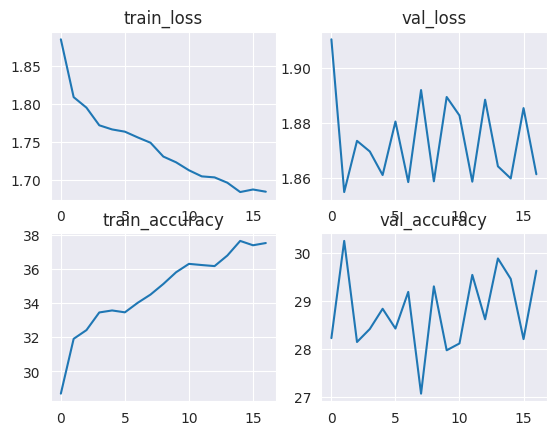

In [10]:
ff_simple_model = FeedForwardModel(256 * 128, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, ff_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.41      0.37      0.39       247
   Classical       0.51      0.59      0.55       254
  Electronic       0.30      0.16      0.21       251
        Folk       0.27      0.23      0.25       248
     Hip-Hop       0.36      0.68      0.47       251
        Jazz       0.29      0.24      0.26       251
         Pop       0.28      0.11      0.16       235
        Rock       0.33      0.43      0.37       247

    accuracy                           0.36      1984
   macro avg       0.34      0.35      0.33      1984
weighted avg       0.34      0.36      0.33      1984



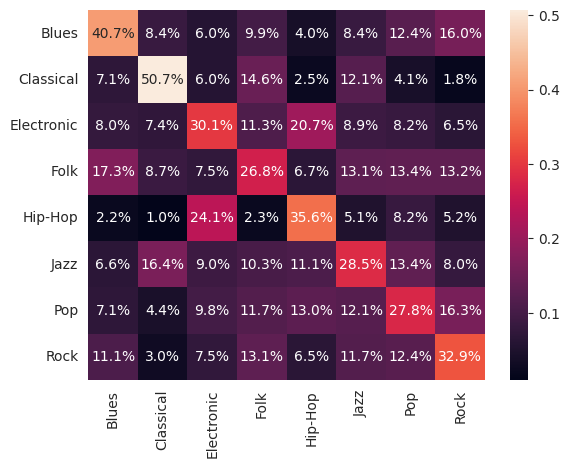

In [11]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, ff_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по времени

 34%|███▍      | 34/100 [15:55<30:54, 28.09s/it]

Early stop!


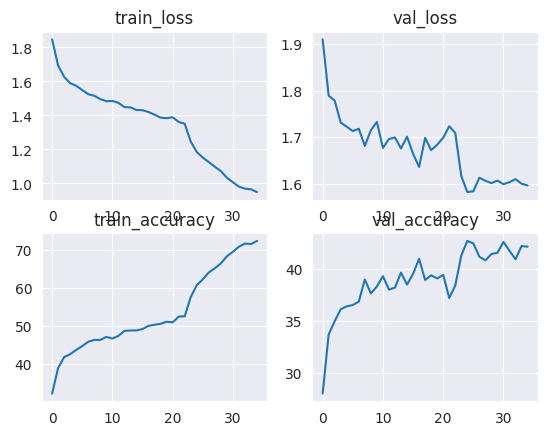

In [15]:
from models.genre_classification.Conv1Model import Conv1Model

conv_1_model = Conv1Model(NUM_CLASSES, time_size=256).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_1_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.53      0.50      0.51       246
   Classical       0.57      0.58      0.57       253
  Electronic       0.26      0.47      0.33       252
        Folk       0.36      0.30      0.33       248
     Hip-Hop       0.73      0.56      0.63       252
        Jazz       0.37      0.25      0.30       252
         Pop       0.29      0.21      0.25       235
        Rock       0.37      0.44      0.40       246

    accuracy                           0.42      1984
   macro avg       0.43      0.41      0.42      1984
weighted avg       0.44      0.42      0.42      1984



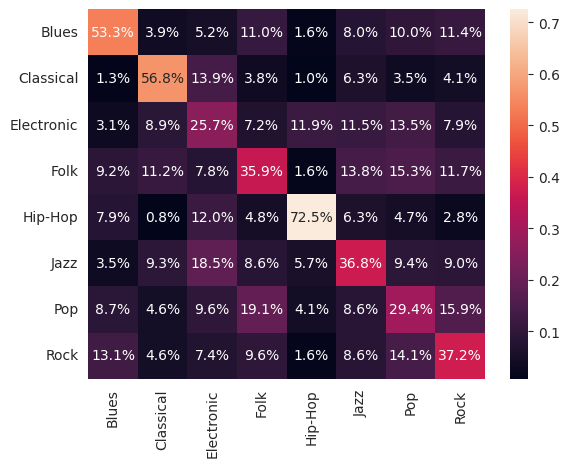

In [16]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_1_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по фичам

 24%|██▍       | 24/100 [12:14<38:47, 30.62s/it]

Early stop!


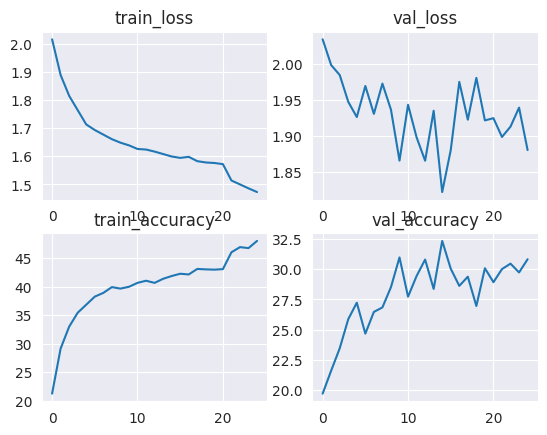

In [19]:
from models.genre_classification.Conv2Model import Conv2Model

conv_2_model = Conv2Model(NUM_CLASSES, 128, 256).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_2_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.66      0.20      0.30       249
   Classical       0.20      0.00      0.01       254
  Electronic       0.31      0.51      0.38       251
        Folk       0.31      0.02      0.03       246
     Hip-Hop       0.75      0.14      0.24       252
        Jazz       0.15      0.03      0.05       252
         Pop       0.25      0.11      0.15       235
        Rock       0.16      0.84      0.27       245

    accuracy                           0.23      1984
   macro avg       0.35      0.23      0.18      1984
weighted avg       0.35      0.23      0.18      1984



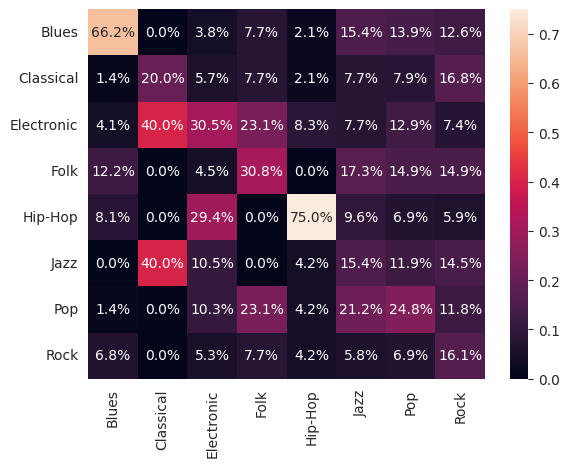

In [20]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_2_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## LSTM

 84%|████████▍ | 84/100 [14:29<02:45, 10.35s/it]

Early stop!


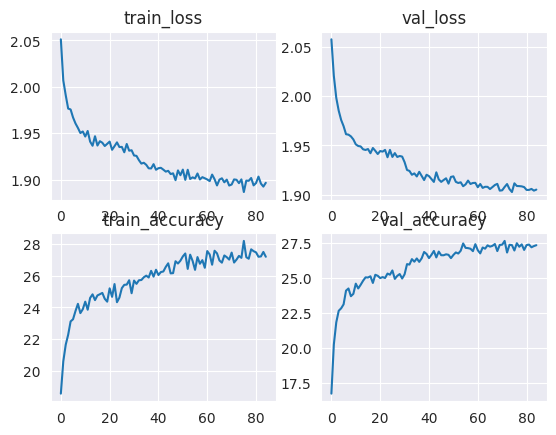

In [21]:
from models.genre_classification.LSTMModel import LSTMModel

lstm_simple_model = LSTMModel(128, 1024, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, lstm_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=1e-4, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.32      0.25      0.28       250
   Classical       0.31      0.70      0.43       253
  Electronic       0.26      0.19      0.22       251
        Folk       0.20      0.18      0.19       246
     Hip-Hop       0.31      0.36      0.33       251
        Jazz       0.17      0.10      0.13       252
         Pop       0.24      0.05      0.08       234
        Rock       0.30      0.40      0.34       247

    accuracy                           0.28      1984
   macro avg       0.26      0.28      0.25      1984
weighted avg       0.26      0.28      0.25      1984



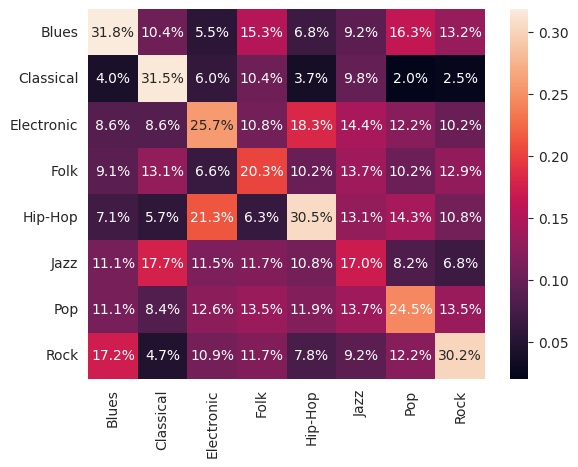

In [22]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, lstm_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по времени и фичам

 21%|██        | 21/100 [02:38<09:54,  7.52s/it]

Early stop!


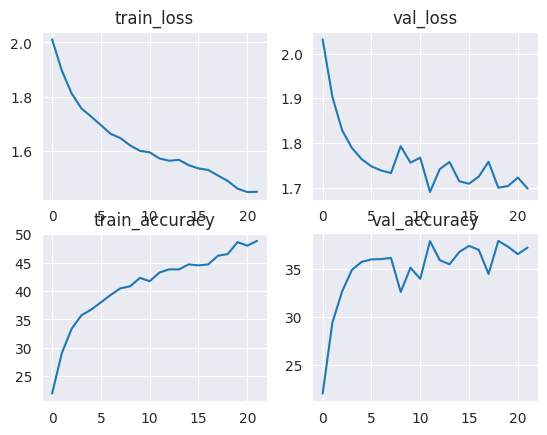

In [30]:
from models.genre_classification.Conv3Model import Conv3Model

conv_3_model = Conv3Model(NUM_CLASSES, 256, 128).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_3_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.30      0.51      0.38       249
   Classical       0.67      0.28      0.39       253
  Electronic       0.45      0.28      0.34       252
        Folk       0.25      0.09      0.13       248
     Hip-Hop       0.77      0.42      0.55       251
        Jazz       0.38      0.05      0.08       251
         Pop       0.21      0.14      0.17       234
        Rock       0.19      0.67      0.29       246

    accuracy                           0.30      1984
   macro avg       0.40      0.30      0.29      1984
weighted avg       0.40      0.30      0.29      1984



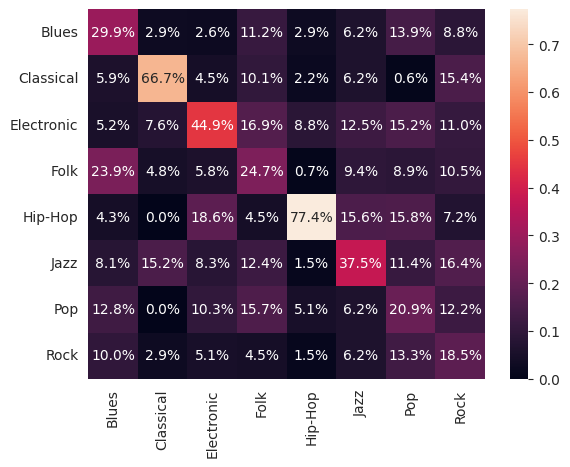

In [31]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_3_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Вариации CRNN

 19%|█▉        | 19/100 [02:46<11:51,  8.78s/it]

Early stop!


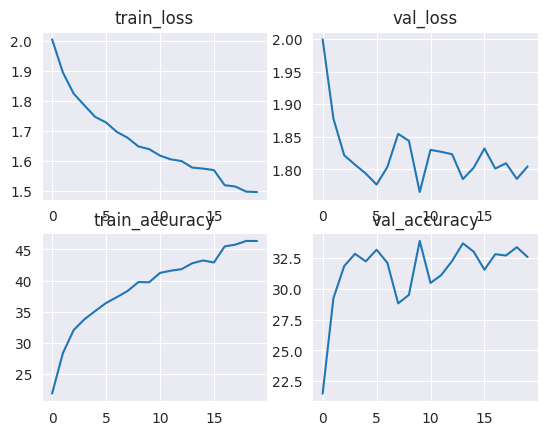

In [12]:
from models.genre_classification.CRNNSimpleModel import CRNNSimpleModel

crnn_model = CRNNSimpleModel(NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, crnn_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.34      0.48      0.40       250
   Classical       0.75      0.43      0.55       254
  Electronic       0.43      0.32      0.37       249
        Folk       0.20      0.21      0.21       247
     Hip-Hop       0.72      0.58      0.64       251
        Jazz       0.41      0.15      0.22       252
         Pop       0.21      0.12      0.15       235
        Rock       0.26      0.65      0.37       246

    accuracy                           0.37      1984
   macro avg       0.41      0.37      0.36      1984
weighted avg       0.42      0.37      0.36      1984



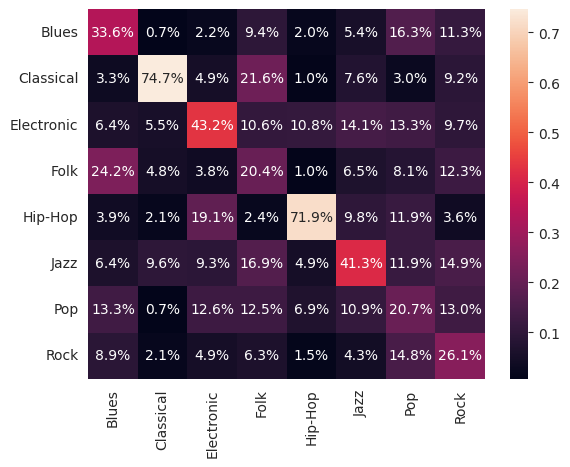

In [13]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, crnn_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

6


 24%|██▍       | 24/100 [03:20<10:36,  8.37s/it]

Early stop!


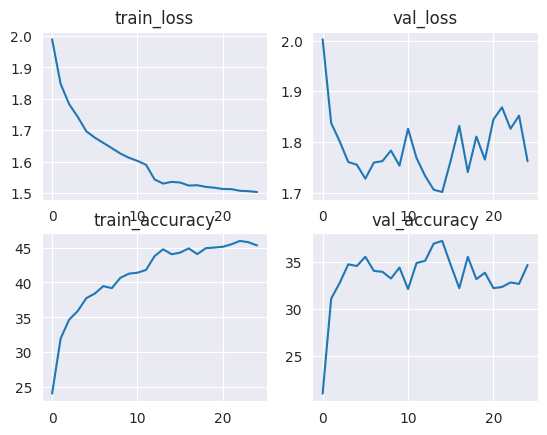

In [14]:
from models.genre_classification.CRNNSimple2Model import CRNNSimple2Model

crnn_model2 = CRNNSimple2Model(NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, crnn_model2, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(10,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.22      0.60      0.33       250
   Classical       0.67      0.01      0.02       254
  Electronic       0.42      0.19      0.26       248
        Folk       0.21      0.10      0.14       246
     Hip-Hop       0.75      0.31      0.44       252
        Jazz       0.10      0.00      0.01       253
         Pop       0.17      0.11      0.14       235
        Rock       0.21      0.67      0.31       246

    accuracy                           0.25      1984
   macro avg       0.34      0.25      0.21      1984
weighted avg       0.35      0.25      0.21      1984



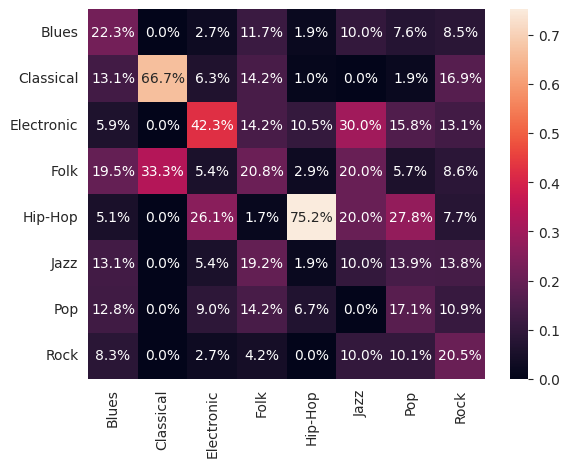

In [15]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, crnn_model2, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Трансформер

  1%|          | 1/100 [00:13<23:04, 13.99s/it]

2.0782097257416825 2.0721806364674724


  2%|▏         | 2/100 [00:28<23:11, 14.20s/it]

2.0174176956045216 2.0112914214424764


  3%|▎         | 3/100 [00:42<22:55, 14.19s/it]

1.9599649799281154 1.9530355383418367


  4%|▍         | 4/100 [00:56<22:37, 14.14s/it]

1.9215306791765936 1.9223991209460844


  5%|▌         | 5/100 [01:10<22:15, 14.06s/it]

1.9034903583855465 1.9083874605889817


  6%|▌         | 6/100 [01:24<21:58, 14.03s/it]

1.8893905738304402 1.8990910762527085


  7%|▋         | 7/100 [01:38<21:43, 14.02s/it]

1.8804889785832373 1.8921269819300663


  8%|▊         | 8/100 [01:52<21:21, 13.93s/it]

1.874218699027752 1.885870621195831


  9%|▉         | 9/100 [02:05<20:42, 13.65s/it]

1.869767453752715 1.8842842873706611


 10%|█         | 10/100 [02:17<20:00, 13.33s/it]

1.8658093016723107 1.8817378577365673


 11%|█         | 11/100 [02:30<19:29, 13.15s/it]

1.8624742170860027 1.8769709521297058


 12%|█▏        | 12/100 [02:43<19:02, 12.98s/it]

1.8558972769770128 1.874567438197392


 13%|█▎        | 13/100 [02:56<18:47, 12.96s/it]

1.8516535405454964 1.8717934679386863


 14%|█▍        | 14/100 [03:08<18:20, 12.80s/it]

1.8490856433736866 1.8686529303964323


 15%|█▌        | 15/100 [03:21<18:12, 12.86s/it]

1.8479085280977448 1.8653805871163647


 16%|█▌        | 16/100 [03:33<17:49, 12.73s/it]

1.842831955284908 1.862306382921007


 17%|█▋        | 17/100 [03:46<17:28, 12.63s/it]

1.8407322554752745 1.862702641435849


 18%|█▊        | 18/100 [03:58<17:11, 12.57s/it]

1.8348731747988998 1.860832307928352


 19%|█▉        | 19/100 [04:11<16:59, 12.59s/it]

1.8302556317428063 1.8527647987488776


 20%|██        | 20/100 [04:23<16:42, 12.53s/it]

1.8321402163341127 1.8587979766203082


 21%|██        | 21/100 [04:36<16:34, 12.59s/it]

1.8277857278955394 1.8508939033768084


 22%|██▏       | 22/100 [04:49<16:21, 12.58s/it]

1.8290349113530127 1.8517662500395144


 23%|██▎       | 23/100 [05:01<16:15, 12.67s/it]

1.8270757387424337 1.8485692372031535


 24%|██▍       | 24/100 [05:15<16:26, 12.97s/it]

1.8234640113238632 1.8489836599664449


 25%|██▌       | 25/100 [05:28<16:15, 13.01s/it]

1.8213964026549767 1.8456848090694795


 26%|██▌       | 26/100 [05:41<15:58, 12.96s/it]

1.818825210373977 1.8482608807984218


 27%|██▋       | 27/100 [05:54<15:39, 12.87s/it]

1.8190849049337978 1.8411471459173387


 28%|██▊       | 28/100 [06:07<15:38, 13.03s/it]

1.8163934740526924 1.8406588967128468


 29%|██▉       | 29/100 [06:21<15:33, 13.14s/it]

1.8123619901722876 1.8380015755212433


 30%|███       | 30/100 [06:34<15:27, 13.25s/it]

1.8109070942319672 1.8352296783932651


 31%|███       | 31/100 [06:48<15:18, 13.31s/it]

1.8145717711284244 1.835211636345019


 32%|███▏      | 32/100 [07:01<15:11, 13.41s/it]

1.8084003456707658 1.8294870203968445


 33%|███▎      | 33/100 [07:15<15:09, 13.58s/it]

1.8121805141712057 1.8296840861706751


 34%|███▍      | 34/100 [07:29<14:59, 13.62s/it]

1.8034044315075053 1.830902746501362


 35%|███▌      | 35/100 [07:42<14:43, 13.59s/it]

1.806552664164839 1.8301669329298014


 36%|███▌      | 36/100 [07:56<14:36, 13.69s/it]

1.8011072125928156 1.8318299640464097


 37%|███▋      | 37/100 [08:10<14:26, 13.75s/it]

1.7987623132508377 1.8270887568005523


 38%|███▊      | 38/100 [08:24<14:17, 13.83s/it]

1.7996153642391337 1.822492394396054


 39%|███▉      | 39/100 [08:38<13:57, 13.72s/it]

1.799153154471825 1.825803402504186


 40%|████      | 40/100 [08:51<13:40, 13.67s/it]

1.8018332917114783 1.8229898060521768


 41%|████      | 41/100 [09:05<13:31, 13.76s/it]

1.7998185955244919 1.824604046814758


 41%|████      | 41/100 [09:19<13:25, 13.65s/it]

1.7917039978093114 1.8201472075609324
Early stop!


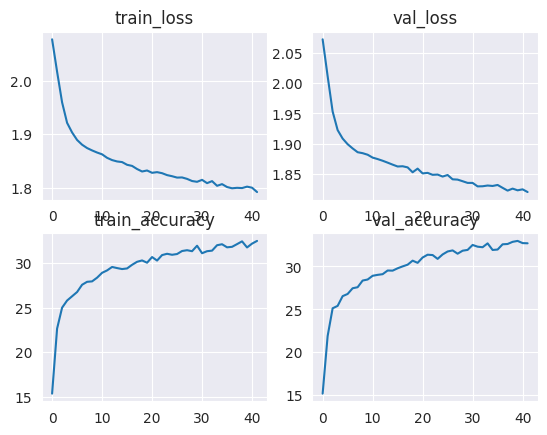

In [9]:
from models.genre_classification.TransformerModel import TransformerModel

transformer_model = TransformerModel(
    input_dim=128,
    num_layers=6,
    output_dim=NUM_CLASSES,
    num_heads=16,
    dropout=0.1,
    hidden_dim=256
).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    transformer_model,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=100,
    learning_rate=0.00001,
    weight_decay=0.01,
    evaluate_per_iteration=15,
    early_stop_after=(15,  0.01),
    print_metrics=True
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.44      0.29      0.35       249
   Classical       0.39      0.68      0.50       253
  Electronic       0.29      0.29      0.29       251
        Folk       0.26      0.20      0.23       249
     Hip-Hop       0.38      0.30      0.34       251
        Jazz       0.29      0.18      0.22       250
         Pop       0.12      0.03      0.05       233
        Rock       0.28      0.58      0.38       248

    accuracy                           0.32      1984
   macro avg       0.31      0.32      0.29      1984
weighted avg       0.31      0.32      0.30      1984



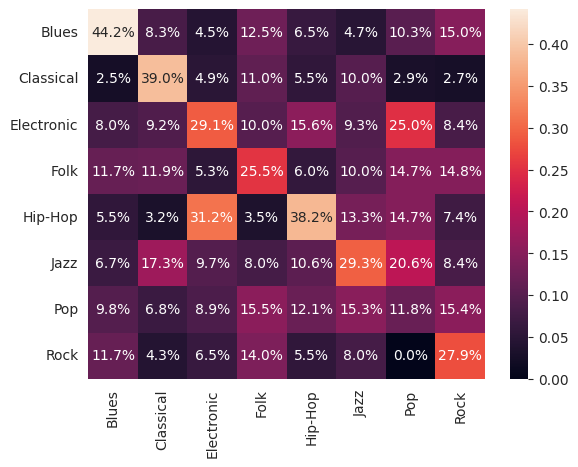

In [11]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, transformer_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)